In [ ]:
import pydeck as pdk
import geopy
import pandas as pd
import math

In [ ]:
df = pd.read_csv('Emergency Preparation 20210719 - Locations.csv')

# Define a layer to display on a map
layer = pdk.Layer(
    "ScatterplotLayer",
    df,
    pickable=True,
    opacity=0.8,
    stroked=True,
    filled=True,
    radius_scale=6,
    radius_min_pixels=1,
    radius_max_pixels=100,
    line_width_min_pixels=1,
    get_position=[40.7128, -74.0060],
    get_radius=2,
    get_fill_color=[255, 140, 0],
    get_line_color=[0, 0, 0],
)

# Set the viewport location
view_state = pdk.ViewState(latitude=40.7128, longitude=-74.0060, zoom=10, bearing=0, pitch=0)

# Render
r = pdk.Deck(layers=[layer], initial_view_state=view_state, tooltip={"text": "{Building Name}\n{Address}"})
r.to_html("scatterplot_layer.html")

In [160]:
from geopy.extra.rate_limiter import RateLimiter
from geopy.geocoders import Nominatim

t = pd.read_csv('Emergency Preparation 20210719 - Locations.csv')
t.dropna(subset = ['Has Spray Showers (46)'], inplace = True)
t.dropna(subset = ['Is Cooling Site (31)'], inplace = True)
t.dropna(subset = ['Address'], inplace = True)

newtable = t[['Building Name', 'Address', 'Has Spray Showers (46)', 'Is Cooling Site (31)']].copy()

locator = Nominatim(user_agent='myGeocoder')
# 1 - conveneint function to delay between geocoding calls
geocode = RateLimiter(locator.geocode, min_delay_seconds=1)
# 2- - create location column
newtable['location'] = newtable['Address'].apply(geocode)
# 3 - create longitude, laatitude and altitude from location column (returns tuple)
newtable['point'] = newtable['location'].apply(lambda loc: tuple(loc.point) if loc else None)

In [164]:
# pd.DataFrame(newtable['point'].tolist(), index=newtable.index)

,0
72,None
73,None
74,None
75,None
76,None
77,None
78,None
79,None
80,None
81,None


In [ ]:
# 4 - split point column into latitude, longitude and altitude columns
newtable[['latitude', 'longitude', 'altitude']] = 

In [ ]:
# t[['Building Name', 'Address', 'Has Spray Showers (46)', 'Is Cooling Site (31)']]

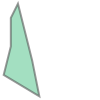

In [ ]:
import shapely
from shapely.geometry import Point, LineString, Polygon
from shapely.geometry import GeometryCollection
g3 = Polygon([[1,-3],[2,1],[2,5],[3,7],[5,-1],[6,-6]])
g3